In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import skfuzzy as fuzz

plt.style.use("seaborn")

iris = datasets.load_iris()
iris.target[149]

data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = pd.DataFrame(iris.target)
#Lets rename the column so that we know that these values refer to the target values
target = target.rename(columns = {0: 'target'})
data = pd.concat([data, target], axis = 1)

# get data
petal_length = np.asarray(data['petal_length'][:150])
petal_width = np.asarray(data['petal_width'][:150])
sepal_length = np.asarray(data['sepal_length'][:150])

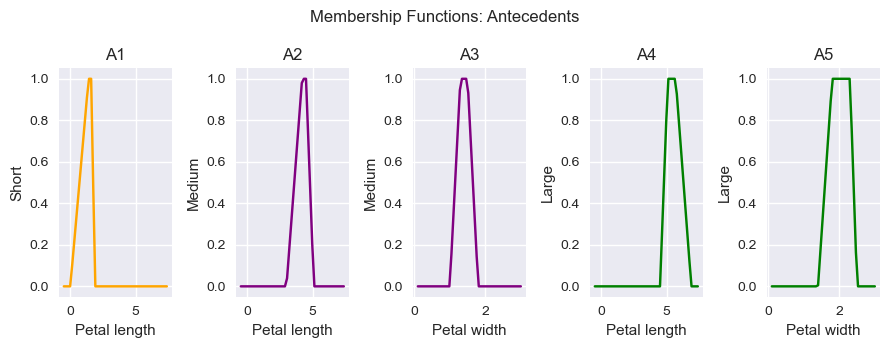

In [17]:
# define membership functions

# Linguistic Rules:

#    1. If petal length is short (A1), then Class 0 (C0)
#    2. If petal length is medium (A2) AND petal width is medium (A3), then Class 1 (C1)
#    3. If petal length is large (A4) AND petal width is large (A5), then Class 2 (C2)

# Antecedents:

#    A1, A2, A3, A4, A5

# x domain is length
petal_length_domain = np.linspace(min(petal_length)-1.5, max(petal_length)+0.5, 50)
petal_width_domain = np.linspace(min(petal_width), max(petal_width)+0.5, 50)

# petal length is short (A1)
abcd_A1 = [0, 1.4, 1.6, 1.9]
membership_A1 = fuzz.trapmf(petal_length_domain, abcd_A1)

# petal length is medium (A2)
abcd_A2 = [3, 4.2, 4.5, 5.1]
membership_A2 = fuzz.trapmf(petal_length_domain, abcd_A2)

# petal width is medium (A3)
abcd_A3 = [1, 1.3, 1.5, 1.8]
membership_A3 = fuzz.trapmf(petal_width_domain, abcd_A3)

# petal length is large (A4)
abcd_A4 = [4.5, 5.1, 5.7, 6.9]
membership_A4 = fuzz.trapmf(petal_length_domain, abcd_A4)

# petal width is large (A5)
abcd_A5 = [1.4,1.8,2.3,2.5]
membership_A5 = fuzz.trapmf(petal_width_domain, abcd_A5)

fig,ax = plt.subplots(1,5, figsize=(9, 3.5))

# Graph A1 petal length is short
ax[0].plot(petal_length_domain, membership_A1, "orange")
ax[0].set_xlabel("Petal length")
ax[0].set_ylabel("Short")
ax[0].set_title("A1")

# Graph A2 petal length is medium
ax[1].plot(petal_length_domain, membership_A2, "purple")
ax[1].set_xlabel("Petal length")
ax[1].set_ylabel("Medium")
ax[1].set_title("A2")

#Graph A3 petal width is medium
ax[2].plot(petal_width_domain, membership_A3, "purple")
ax[2].set_xlabel("Petal width")
ax[2].set_ylabel("Medium")
ax[2].set_title("A3")

#Graph A4 petal length is large
ax[3].plot(petal_length_domain, membership_A4, "green")
ax[3].set_xlabel("Petal length")
ax[3].set_ylabel("Large")
ax[3].set_title("A4")

#Graph A5 petal width is large
ax[4].plot(petal_width_domain, membership_A5, "green")
ax[4].set_xlabel("Petal width")
ax[4].set_ylabel("Large")
ax[4].set_title("A5")

fig.suptitle("Membership Functions: Antecedents")
fig.tight_layout()

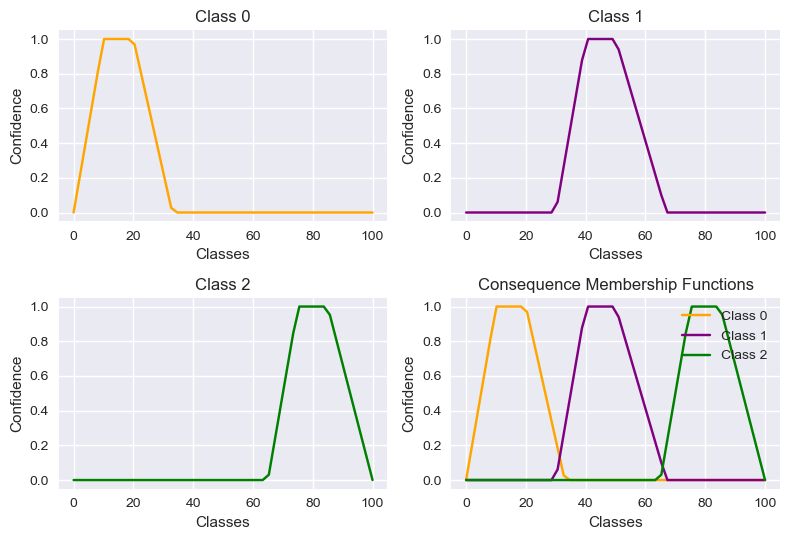

In [18]:
# Consequences:
#
#    C0, C1, C2
classes = np.linspace(0, 100, 50)
fig,ax = plt.subplots(2,2)

abcd_C0 = [0, 10, 20, 33]
membership_C0 = fuzz.trapmf(classes, abcd_C0)

abcd_C1 = [30, 40, 50, 67]
membership_C1 = fuzz.trapmf(classes, abcd_C1)

abcd_C2 = [65, 75, 85, 100]
membership_C2 = fuzz.trapmf(classes, abcd_C2)

# If petal length is short (A1), then Class 0 (C0)
ax[0, 0].plot(classes,membership_C0,"orange")
ax[0, 0].set_xlabel("Classes")
ax[0, 0].set_ylabel("Confidence")
ax[0, 0].set_title("Class 0")

ax[0, 1].plot(classes,membership_C1,"purple")
ax[0, 1].set_xlabel("Classes")
ax[0, 1].set_ylabel("Confidence")
ax[0, 1].set_title("Class 1")

ax[1, 0].plot(classes,membership_C2,"green")
ax[1, 0].set_xlabel("Classes")
ax[1, 0].set_ylabel("Confidence")
ax[1, 0].set_title("Class 2")

ax[1, 1].plot(classes,membership_C0,"orange",label="Class 0")
ax[1, 1].plot(classes,membership_C1,"purple",label="Class 1")
ax[1, 1].plot(classes,membership_C2,"green",label="Class 2")
ax[1, 1].set_xlabel("Classes")
ax[1, 1].set_ylabel("Confidence")
ax[1, 1].set_title("Consequence Membership Functions")
ax[1, 1].legend(loc="upper right")

plt.tight_layout()

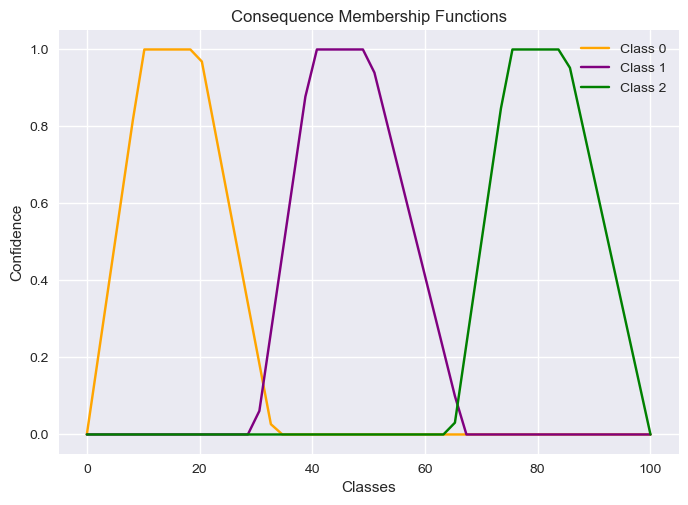

In [19]:
fig, ax = plt.subplots()
ax.plot(classes,membership_C0,"orange",label="Class 0")
ax.plot(classes,membership_C1,"purple",label="Class 1")
ax.plot(classes,membership_C2,"green",label="Class 2")
ax.set_xlabel("Classes")
ax.set_ylabel("Confidence")
ax.set_title("Consequence Membership Functions")
ax.legend(loc="upper right")

In [20]:
def plot_antecedents():
    
    fig, ax = plt.subplots(5, 1, figsize = (10, 8))
    
    ax[0].plot(petal_length_domain, membership_A1, "orange")
    ax[1].plot(petal_length_domain, membership_A2, "purple")
    ax[2].plot(petal_width_domain, membership_A3, "purple")
    ax[3].plot(petal_length_domain, membership_A4, "green")
    ax[4].plot(petal_width_domain, membership_A5, "green")
    
    ax[0].fill_between(petal_length_domain, np.minimum(membership_A1, pl_short), color = "orange", alpha = 0.4)
    ax[1].fill_between(petal_length_domain, np.minimum(membership_A2, pl_medium), color = "purple", alpha = 0.4)
    ax[2].fill_between(petal_width_domain, np.minimum(membership_A3, pw_medium), color = "purple", alpha = 0.4)
    ax[3].fill_between(petal_length_domain, np.minimum(membership_A4, pl_large), color = "green", alpha = 0.4)
    ax[4].fill_between(petal_width_domain, np.minimum(membership_A5, pw_large), color = "green", alpha = 0.4)
    
    
    # Graph A1 petal length is short
    
    ax[0].plot(petal_length_domain, membership_A1, "orange")
    ax[0].set_xlabel("Petal length")
    ax[0].set_ylabel("Short")
    ax[0].set_title("A1 Membership = %s" % (np.round(pl_short, 4)))

    # Graph A2 petal length is medium
    
    ax[1].plot(petal_length_domain, membership_A2, "purple")
    ax[1].set_xlabel("Petal length")
    ax[1].set_ylabel("Medium")
    ax[1].set_title("A2 Membership = %s" % (np.round(pl_medium,4)))

    #Graph A3 petal width is medium
    
    ax[2].plot(petal_width_domain, membership_A3, "purple")
    ax[2].set_xlabel("Petal width")
    ax[2].set_ylabel("Medium")
    ax[2].set_title("A3 Membership = %s" % (np.round(pw_medium,4)))

    #Graph A4 petal length is large
    
    ax[3].plot(petal_length_domain, membership_A4, "green")
    ax[3].set_xlabel("Petal length")
    ax[3].set_ylabel("Large")
    ax[3].set_title("A4 Membership = %s" % (np.round(pl_large,4)))

    #Graph A5 petal width is large
    
    ax[4].plot(petal_width_domain, membership_A5, "green")
    ax[4].set_xlabel("Petal width")
    ax[4].set_ylabel("Large")
    ax[4].set_title("A5 Membership = %s" % (np.round(pw_large,4)))

    fig.tight_layout()

In [21]:
def plot_implication():
    
    fig, ax = plt.subplots(3, 1, figsize = (10, 8))
    
    ax[0].plot(classes, membership_C0, "orange")
    ax[1].plot(classes, membership_C1, "purple")
    ax[2].plot(classes, membership_C2, "green")
    
    ax[0].fill_between(classes, rule1, color = "orange", alpha = 0.4)
    ax[1].fill_between(classes, rule2, color = "purple", alpha = 0.4)
    ax[2].fill_between(classes, rule3, color = "green", alpha = 0.4)
    
    ax[0].set_xlabel("Classes")
    ax[0].set_ylabel("Confidence")
    ax[0].set_title("C0 Membership = %s" % (np.round(A1_prop, 4)))

    # Graph A2 petal length is medium
    
    ax[1].set_xlabel("Classes")
    ax[1].set_ylabel("Confidence")
    ax[1].set_title("C1 Membership = %s" % (np.round(A2_prop,4)))

    #Graph A3 petal width is medium
    
    ax[2].set_xlabel("Classes")
    ax[2].set_ylabel("Confidence")
    ax[2].set_title("C2 Membership = %s" % (np.round(A3_prop,4)))

    fig.tight_layout()
    

In [22]:
def plot_defuzz():
    
    fig, ax = plt.subplots(figsize = (7, 5))
    
    ax.plot(classes, membership_C0, "orange")
    ax.plot(classes, membership_C1, "purple")
    ax.plot(classes, membership_C2, "green")
    
    ax.fill_between(classes, agg, color = "red", alpha = 0.4)
    ax.set_xlabel("Classes")
    ax.set_ylabel("Confidence")
    ax.set_title("Classification = %s" % (prediction))

In [44]:
def score(all_preds, all_truths):
    
    problems = []
    
    accuracy = []
    for i, (pred, truth) in enumerate(zip(all_preds, all_truths)):
        if(pred == truth):
            accuracy.append(1)
        else:
            accuracy.append(0)
            problems.append(i)
    
    accuracy = sum(accuracy) / len(accuracy)
    print(f"problems = {problems}")
    print(f"accuracy = {accuracy}")
    
    return accuracy, problems  #performance measure
    

     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

Observation: Index = 70, Features = [4.8 1.8], Truth Label = [1.]

[]


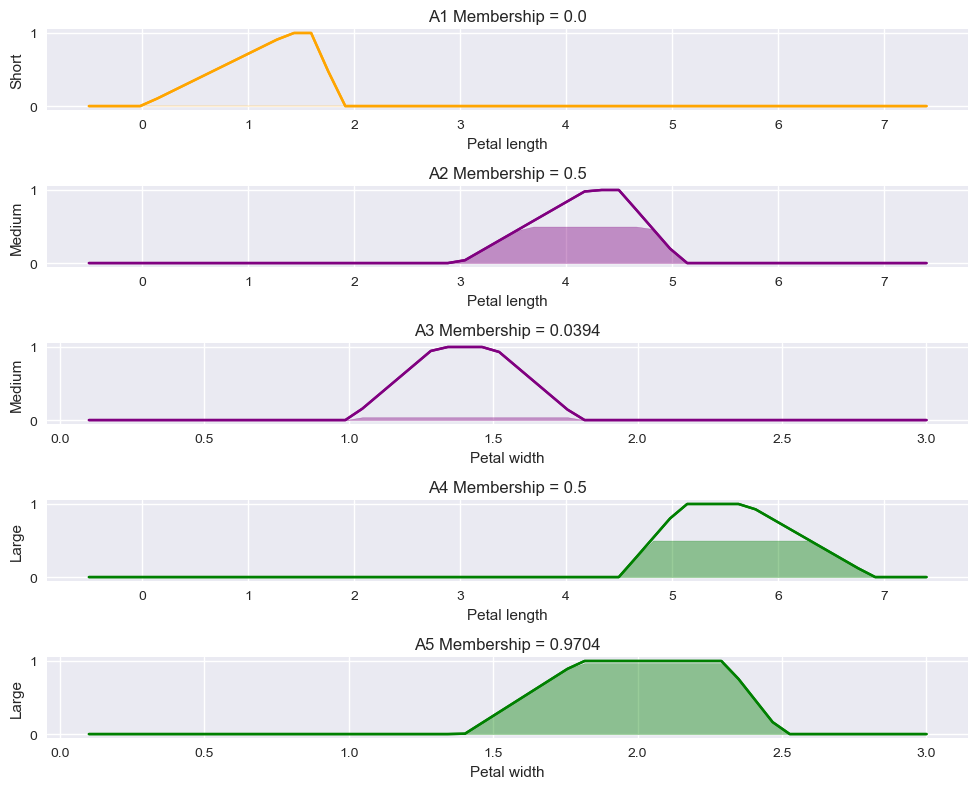

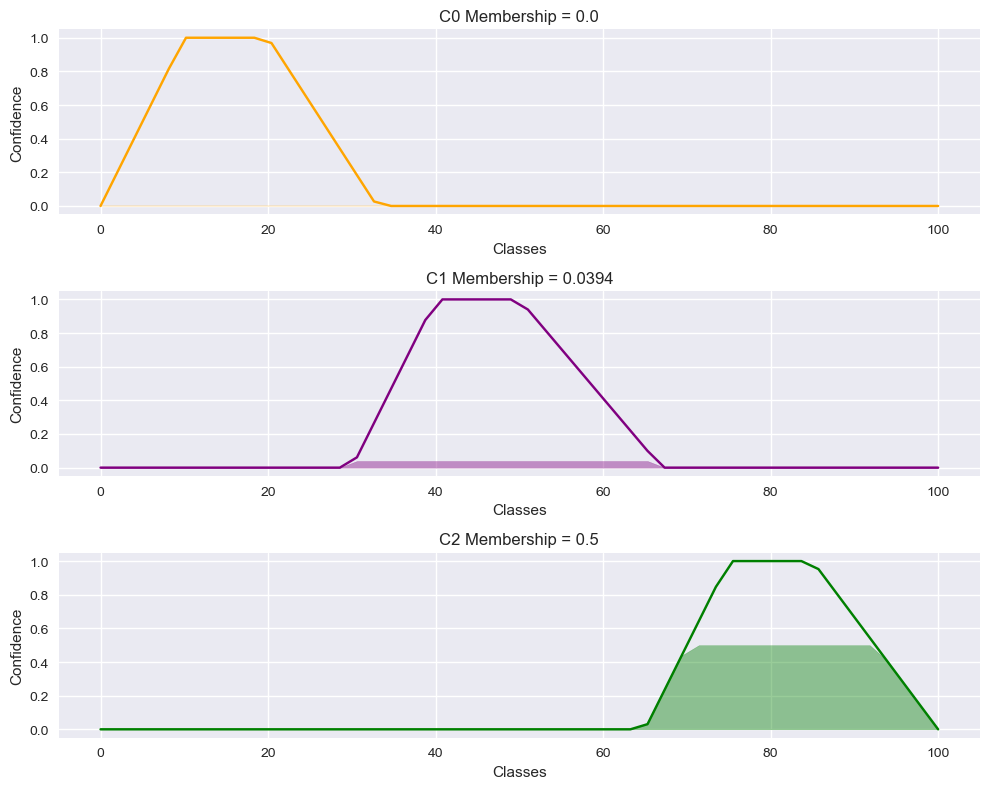

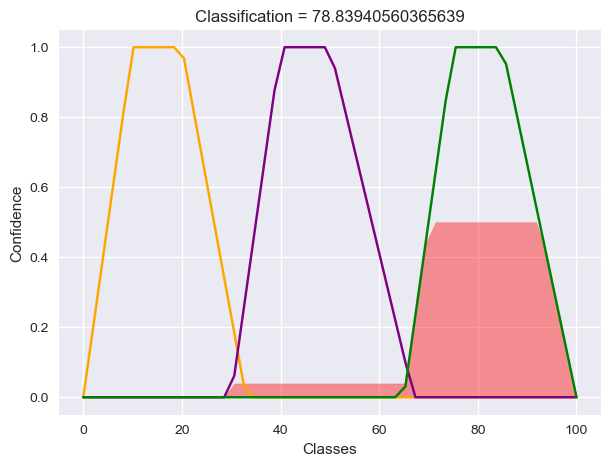

In [55]:
# Evaluate test data through FLS

index = 70
verbose = [1, index]

print(data)
np_data = np.asarray(data)
samples, labels = np_data[:, :-1], np_data[:, -1:]

all_preds = []
for x, y in zip(samples, labels):
    
    # My rules only analyze petal length and petal width 
    
    if(verbose[0]):
        x = samples[index]
        y = labels[index]
        
        print("\nObservation: Index = %s, Features = %s, Truth Label = %s\n" % (index, x[-2:], y))
    
    # Fuzzify inputs
    
    x = x[-2:]
        
    pl, pw = x
    
    # fuzzify by evaluating inputs through their membership functions. 
    pl_short = fuzz.interp_membership(petal_length_domain, membership_A1, pl)
    pl_medium = fuzz.interp_membership(petal_length_domain, membership_A2, pl)
    pl_large = fuzz.interp_membership(petal_length_domain, membership_A4, pl)
    pw_medium = fuzz.interp_membership(petal_width_domain, membership_A3, pw)
    pw_large = fuzz.interp_membership(petal_width_domain, membership_A5, pw)
    
    if(verbose[0]):
        plot_antecedents()
    
    # Calculate proposition (proposition: aggregation of rules) this is applying fuzzy operation.
    # this gives us a scalar. the proposition is always a scalar.
    
    # consequence is "class 0", "class 1", "class 2"
    
    #    1. If petal length is short (A1), then Class 0 (C0)
    #    2. If petal length is medium (A2) AND petal width is medium (A3), then Class 1 (C1)
    #    3. If petal length is large (A4) AND petal width is large (A5), then Class 2 (C2)
    
    #    R1 -> A1' = If (A1) Then (C0)
    #    R2 -> A2' = If (A2 && A3) Then (C1)
    #    R3 -> A3' = If (A4 && A5) Then (C2)
    
    # A1' = A1
    # A2' = min(A2, A3)
    # A3' = min(A4, A5)
    
    A1_prop = pl_short
    A2_prop = np.minimum(pl_medium, pw_medium)
    A3_prop = np.minimum(pl_large, pw_large)
    #print(f"A1_prop = {A1_prop}")
    #print(f"A2_prop = {A2_prop}")
    #print(f"A3_prop = {A3_prop}")

        
    # Calculate implications (apply fuzzy operator. correlation min)
    # we're figuring out how well each rule fired.
    
    # imlication operator is correlation min(). the implication returns a fuzzy set.
    
    rule1 = np.minimum(A1_prop, membership_C0)
    rule2 = np.minimum(A2_prop, membership_C1)
    rule3 = np.minimum(A3_prop, membership_C2)
    
    if(verbose[0]):
        plot_implication()
    
    # Aggregate all outputs

    agg = np.fmax(rule1, np.fmax(rule2, rule3))   
    
    # Defuzzify: centroid
    
    prediction = fuzz.defuzz(classes, agg, "centroid")
    
    if(verbose[0]):
        plot_defuzz()
        break
        
    # Get classfication from FLS prediction
    
    if(prediction > 0 and prediction <= 33):
        prediction = 0
    elif(prediction > 33 and prediction <= 66):
        prediction = 1
    else:
        prediction = 2    
        
    all_preds.append(prediction)
print(all_preds)


In [54]:
if(not(verbose[0])):
    score(all_preds, labels)

problems = [70, 77, 83, 106]
accuracy = 0.9733333333333334


In [50]:
#how do i display my efficacy?

